In [1]:
# Import relevant libraries
import requests
import pandas as pd
import os
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plot

In [2]:
print(os.getcwd())
# Directory should be at github repo level.
# .. to move up 2 directory level.
os.chdir("..")
print(os.getcwd())

C:\Users\lotte\OneDrive - London School of Economics\Documenten\GitHub\2024-project-pollution-team\CODE_INDIA
C:\Users\lotte\OneDrive - London School of Economics\Documenten\GitHub\2024-project-pollution-team


In [3]:
dataset = pd.read_csv("DATA_INDIA/CLEAN_MERGED/complete_dataset.csv")

In [4]:
display(dataset)

,Unnamed: 0,State,City,City Population,State Population,State Area (sq. km),Forest Area(sq. km in state),Registered Vehicles in City,Registered Vehicles in State,Farming Area (sq. km in state),...,Humidity,Wind,Precipitation,Clouds,Sunshine,Coal Capacity (Max Electricity ouput in MW),Gas Capacity (Max Electricity ouput in MW),aqi,missing_aqi,AQI Category
0,0,uttar pradesh,agra,1430055.0,238875000.0,240928.0,14818.0,54261.0,34924824.0,685.6,...,68.55,2.23,0.01,14.88,241.62,16608.0,1469.00,121.258065,0.000000,Moderate
1,1,gujarat,ahmedabad,3719710.0,72653000.0,196244.0,14926.0,450099.0,26836981.0,518.3,...,55.86,2.43,0.00,9.51,252.54,15592.0,7990.72,133.483871,0.000000,Moderate
2,2,mizoram,aizawl,265331.0,1252000.0,21081.0,17820.0,NaN,267350.0,71.0,...,76.38,1.07,0.02,23.92,172.62,0.0,0.00,43.275862,0.064516,Good
3,3,rajasthan,ajmer,517911.0,82188000.0,342239.0,16655.0,NaN,19236010.0,537.4,...,51.28,2.29,0.01,11.37,265.92,4955.0,856.80,111.774194,0.000000,Moderate
4,4,maharashtra,akola,428857.0,127684000.0,307713.0,50798.0,NaN,37786256.0,536.2,...,48.98,2.29,0.01,15.32,243.00,16750.0,3460.00,135.193548,0.000000,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,277,tamil nadu,virudhunagar,NaN,77165000.0,130060.0,26419.0,NaN,32094588.0,371.2,...,70.71,2.58,0.02,38.66,41.77,12160.0,1013.49,61.157895,0.387097,Satisfactory
261,278,andhra pradesh,visakhapatnam,1063178.0,53402000.0,162968.0,29784.0,NaN,13108491.0,351.3,...,76.74,2.59,0.00,23.01,135.15,11275.0,7508.20,193.607143,0.096774,Moderate
262,279,uttar pradesh,vrindavan,NaN,238875000.0,240928.0,14818.0,NaN,34924824.0,685.6,...,68.28,2.26,0.02,16.35,234.77,16608.0,1469.00,77.642857,0.096774,Satisfactory
263,280,karnataka,yadgir,NaN,68256000.0,191791.0,38730.0,NaN,26117614.0,585.9,...,NaN,NaN,NaN,NaN,NaN,7080.0,0.00,90.034483,0.064516,Satisfactory


In [5]:
# Data Visualization on City Level
dataset_weather = dataset[["City", "Temperature", "Pressure", "Humidity", "Precipitation", "Wind", "Clouds", "Sunshine"]]
dataset_weather = dataset_weather.dropna()
city_list = dataset_weather["City"]
dataset_weather = dataset_weather.drop("City", axis = 1)

Text(0.5, 0.98, 'Histograms of seven weather characteristics of XXX Indian cities in January 2024')

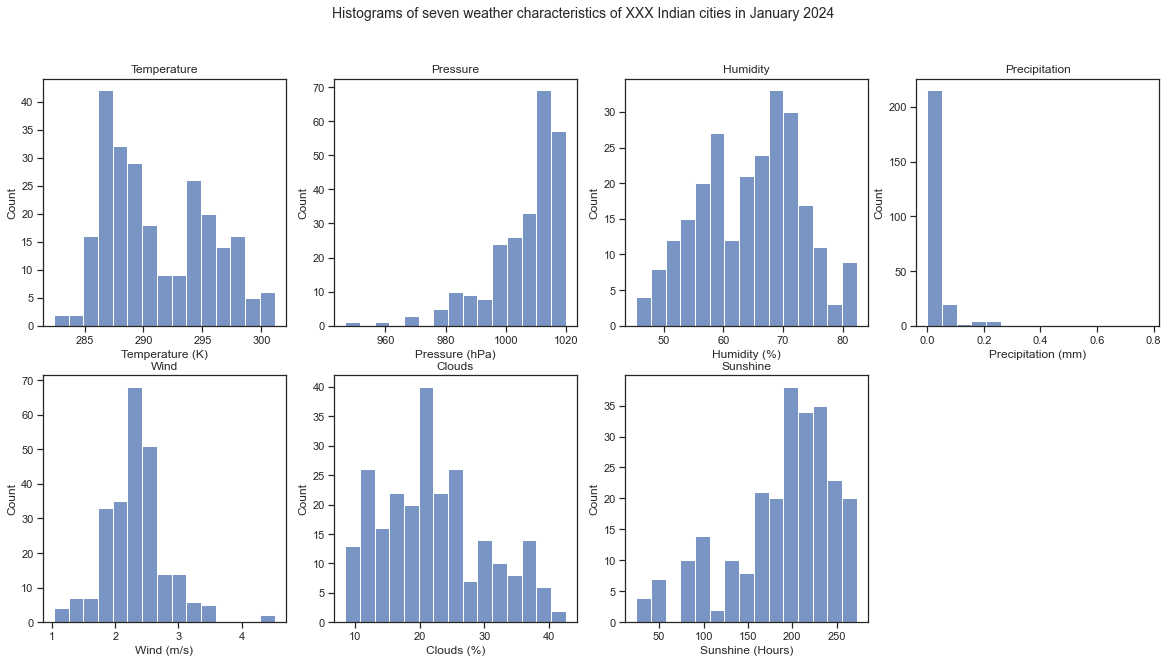

In [6]:
# Histograms per weather characteristic on city level
sns.set_theme(style='ticks')
fig, axs = plot.subplots(2,4, figsize=(20,10))
n_bins = 15

# Temperature plot
sns.histplot(data = dataset_weather["Temperature"], bins = n_bins, ax = axs[0,0])
axs[0,0].set_title("Temperature", fontsize=12)
axs[0,0].set(xlabel="Temperature (K)", ylabel = "Count")

# Pressure plot
sns.histplot(dataset_weather["Pressure"],bins = n_bins, ax = axs[0,1])
axs[0,1].set_title("Pressure", fontsize=12)
axs[0,1].set(xlabel="Pressure (hPa)", ylabel = "Count")

# Humidity plot
sns.histplot(data = dataset_weather["Humidity"], bins = n_bins, ax = axs[0,2])
axs[0,2].set_title("Humidity", fontsize=12)
axs[0,2].set(xlabel="Humidity (%)", ylabel = "Count")

# Precipitation plot
sns.histplot(data = dataset_weather["Precipitation"], bins = n_bins, ax = axs[0,3])
axs[0,3].set_title("Precipitation", fontsize=12)
axs[0,3].set(xlabel="Precipitation (mm)", ylabel = "Count")

# Wind plot
sns.histplot(data = dataset_weather["Wind"], bins = n_bins, ax = axs[1,0])
axs[1,0].set_title("Wind", fontsize=12)
axs[1,0].set(xlabel="Wind (m/s)", ylabel = "Count")

# Clouds plot
sns.histplot(data = dataset_weather["Clouds"], bins = n_bins, ax = axs[1,1])
axs[1,1].set_title("Clouds", fontsize=12)
axs[1,1].set(xlabel="Clouds (%)", ylabel = "Count")

# Sunshine plot
sns.histplot(data = dataset_weather["Sunshine"], bins = n_bins, ax = axs[1,2])
axs[1,2].set_title("Sunshine", fontsize=12)
axs[1,2].set(xlabel="Sunshine (Hours)", ylabel = "Count")

fig.delaxes(axs[1,3])
fig.suptitle("Histograms of seven weather characteristics of XXX Indian cities in January 2024", fontsize=14)

Text(0.5, 0.98, 'Histograms of seven weather characteristics of XXX Indian cities in January 2024')

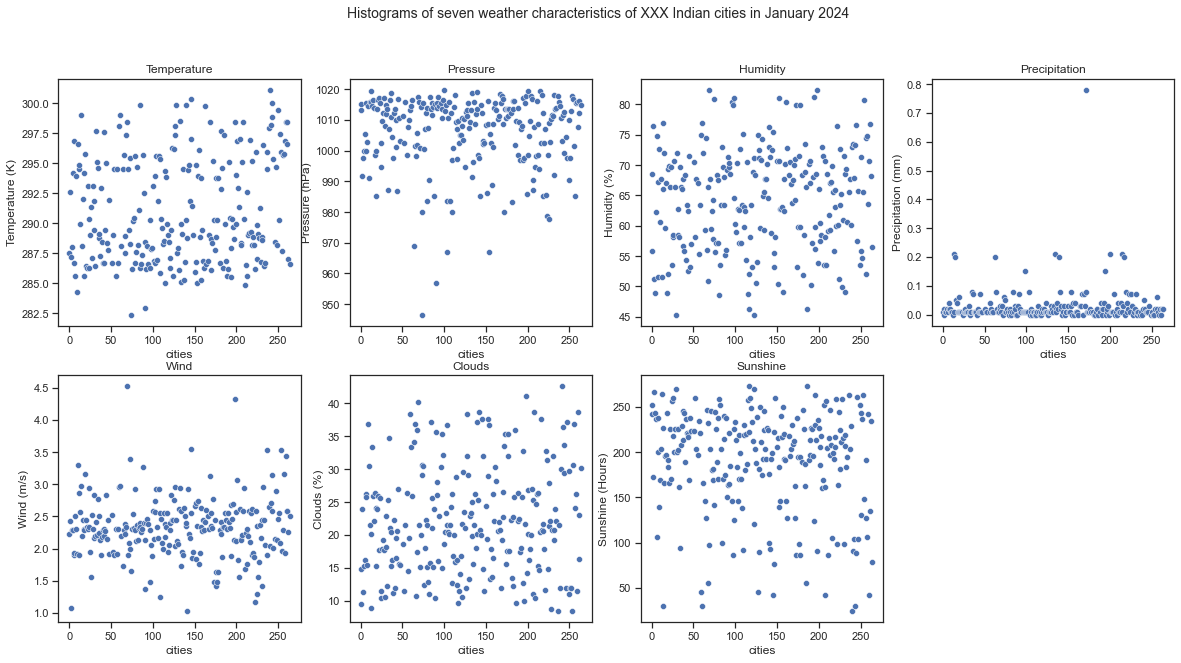

In [7]:
# Scatterplot per weather characteristic on city level
sns.set_theme(style='ticks')
fig, axs = plot.subplots(2,4, figsize=(20,10))
n_bins = 15

# Temperature plot
sns.scatterplot(data = dataset_weather["Temperature"], ax = axs[0,0])
axs[0,0].set_title("Temperature", fontsize=12)
axs[0,0].set(xlabel = "cities", ylabel="Temperature (K)")

# Pressure plot
sns.scatterplot(data = dataset_weather["Pressure"], ax = axs[0,1])
axs[0,1].set_title("Pressure", fontsize=12)
axs[0,1].set(xlabel = "cities", ylabel="Pressure (hPa)")

# Humidity plot
sns.scatterplot(data = dataset_weather["Humidity"], ax = axs[0,2])
axs[0,2].set_title("Humidity", fontsize=12)
axs[0,2].set(xlabel = "cities", ylabel="Humidity (%)")

# Precipitation plot
sns.scatterplot(data = dataset_weather["Precipitation"], ax = axs[0,3])
axs[0,3].set_title("Precipitation", fontsize=12)
axs[0,3].set(xlabel = "cities", ylabel="Precipitation (mm)")

# Wind plot
sns.scatterplot(data = dataset_weather["Wind"], ax = axs[1,0])
axs[1,0].set_title("Wind", fontsize=12)
axs[1,0].set(xlabel = "cities", ylabel="Wind (m/s)")

# Clouds plot
sns.scatterplot(data = dataset_weather["Clouds"], ax = axs[1,1])
axs[1,1].set_title("Clouds", fontsize=12)
axs[1,1].set(xlabel = "cities", ylabel="Clouds (%)")

# Sunshine plot
sns.scatterplot(data = dataset_weather["Sunshine"],  ax = axs[1,2])
axs[1,2].set_title("Sunshine", fontsize=12)
axs[1,2].set(xlabel = "cities", ylabel="Sunshine (Hours)")

fig.delaxes(axs[1,3])
fig.suptitle("Histograms of seven weather characteristics of XXX Indian cities in January 2024", fontsize=14)

Text(0.5, 1.04, 'Pairplot of weather characteristics for XXXX cities in India in January 2024')

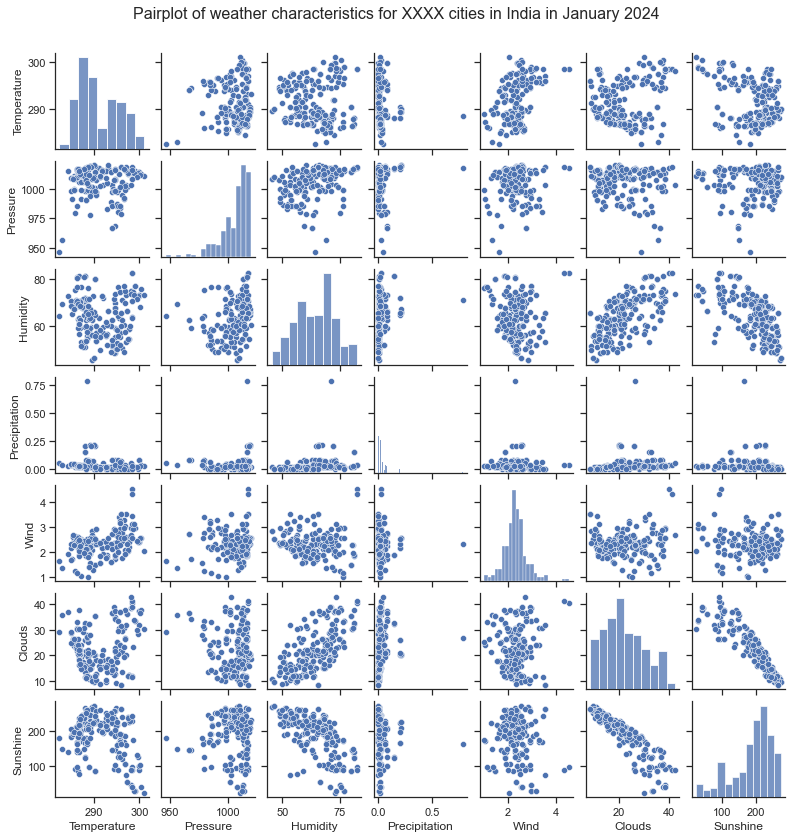

In [8]:
# Pairplot for weather characteristics on city Level
sns.pairplot(dataset_weather, height =1.6)
plot.suptitle("Pairplot of weather characteristics for XXXX cities in India in January 2024", y = 1.04, fontsize='16')

Text(120.453125, 0.5, 'Weather Characteristics')

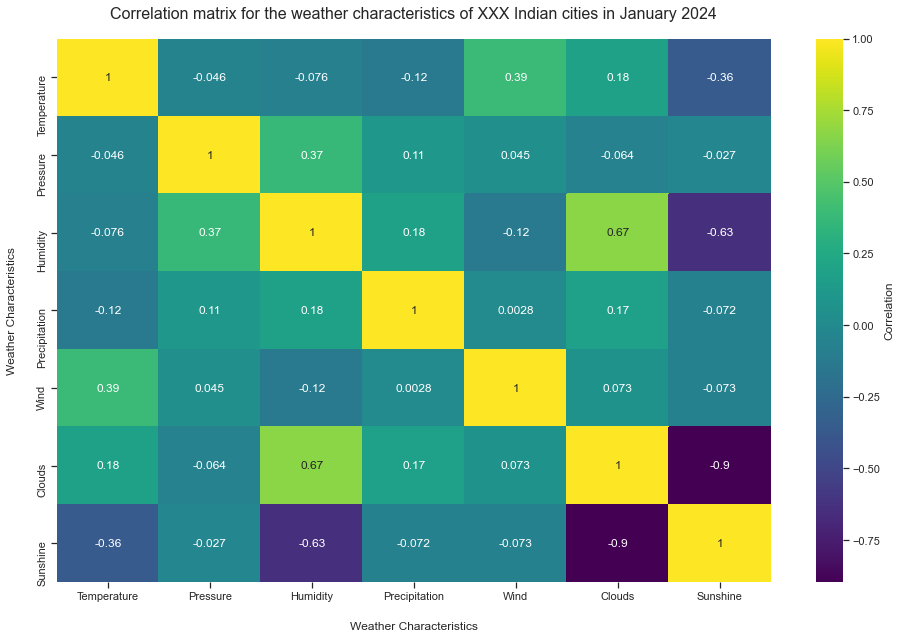

In [9]:
# Heatmap for weather characteristics on city level
# Correlation matrix
cor_weather_df = pd.DataFrame(index = dataset_weather.columns, columns = dataset_weather.columns)

# Calculating the pearson correlation for each pair of weather data
for i in range(len(dataset_weather.columns)):
    for j in range(len(dataset_weather.columns)):
        cor_weather_df.iloc[i,j]=dataset_weather.iloc[:,i].corr(dataset_weather.iloc[:,j])
cor_weather = cor_weather_df.values.astype(float)

# Plot the correlation matrix as a heatmap
fig, ax = plot.subplots(1,1, figsize=(16,10))
sns.heatmap(cor_weather, annot = True, cmap='viridis',cbar_kws={"label":"Correlation"}, xticklabels=dataset_weather.columns, yticklabels=dataset_weather.columns)
plot.title("Correlation matrix for the weather characteristics of XXX Indian cities in January 2024", fontsize = 16, pad = 20)
ax.set_xlabel("Weather Characteristics", labelpad = 20, fontsize = 12)
ax.set_ylabel("Weather Characteristics", labelpad = 20, fontsize = 12)

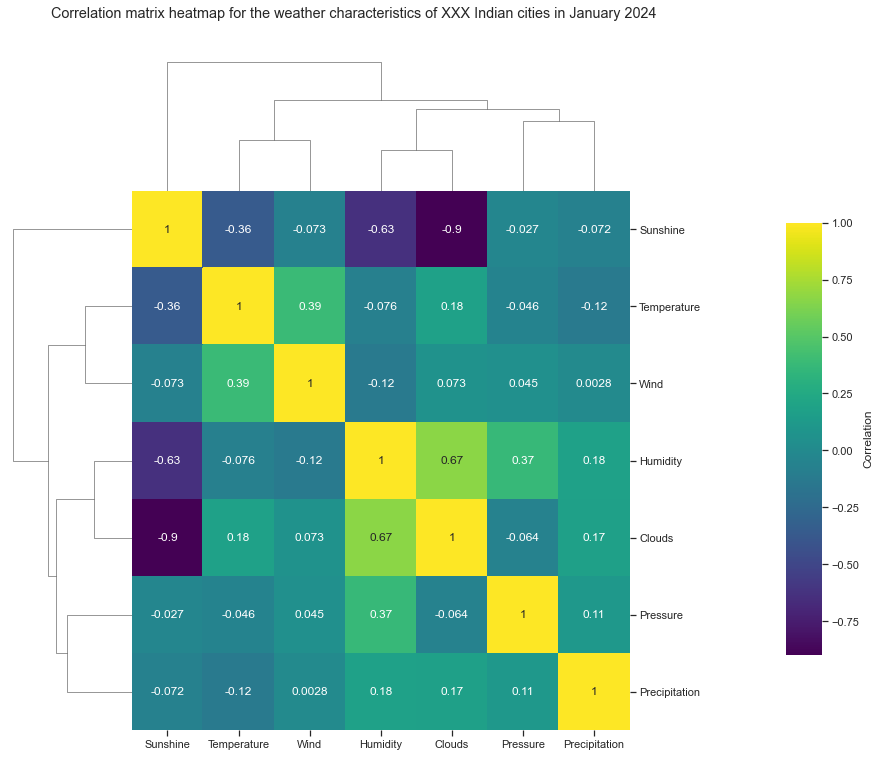

In [10]:
# Clustermap for weather data per city using an average linkage method and euclidean distance metric
cluster_city = sns.clustermap(cor_weather, annot = True, method="average", metric="euclidean", cmap="viridis", figsize = (10,10), cbar_kws={"label":"Correlation"}, cbar_pos = (1.1,0.15,0.05,0.6),xticklabels=dataset_weather.columns, yticklabels=dataset_weather.columns)
cluster_city = cluster_city.fig.suptitle("Correlation matrix heatmap for the weather characteristics of XXX Indian cities in January 2024", y=1.05)

Text(120.453125, 0.5, 'Cities')

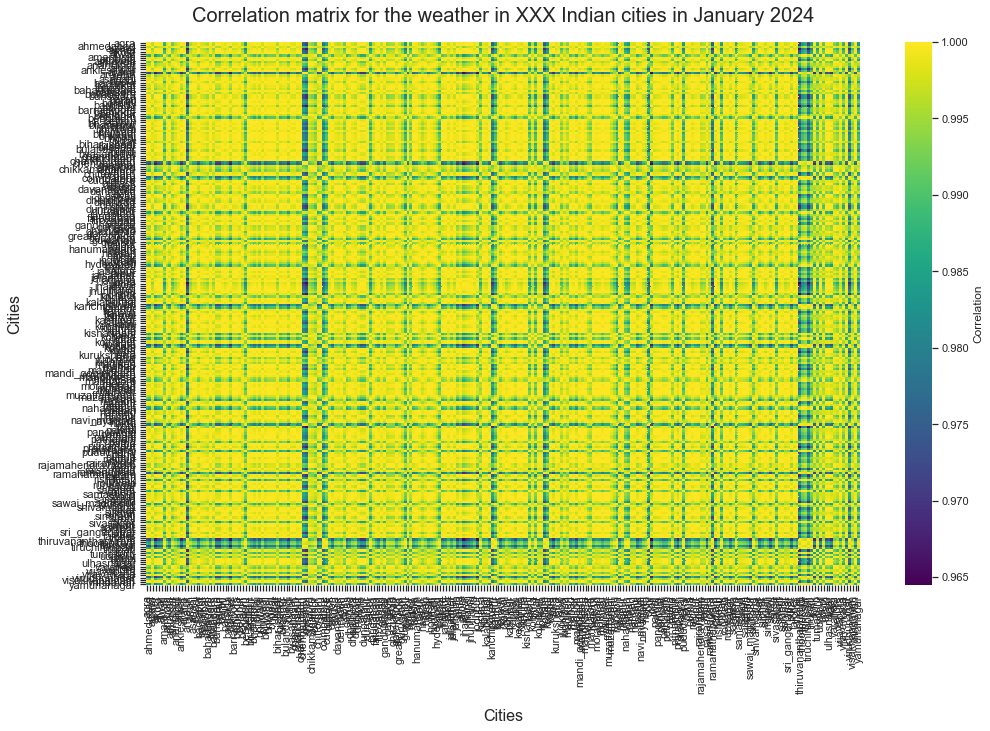

In [11]:
# Heatmap for cities on city level
# Correlation matrix
cor_weather_df = pd.DataFrame(index = dataset_weather.index, columns = dataset_weather.index)

# Calculating the pearson correlation for each pair of weather data
for i in range(len(dataset_weather.index)):
    for j in range(len(dataset_weather.index)):
        cor_weather_df.iloc[i,j]=dataset_weather.iloc[i,:].corr(dataset_weather.iloc[j,:])
cor_weather = cor_weather_df.values.astype(float)

# Plot the correlation matrix as a heatmap
fig, ax = plot.subplots(1,1, figsize=(16,10))
sns.set(font_scale=1)
ax = sns.heatmap(cor_weather, cmap='viridis',cbar_kws={"label":"Correlation"}, xticklabels=city_list, yticklabels=city_list)
plot.title("Correlation matrix for the weather in XXX Indian cities in January 2024", fontsize = 20, pad = 20)
ax.set_xlabel("Cities", labelpad = 15, fontsize = 16)
ax.set_ylabel("Cities", labelpad = 15, fontsize = 16)

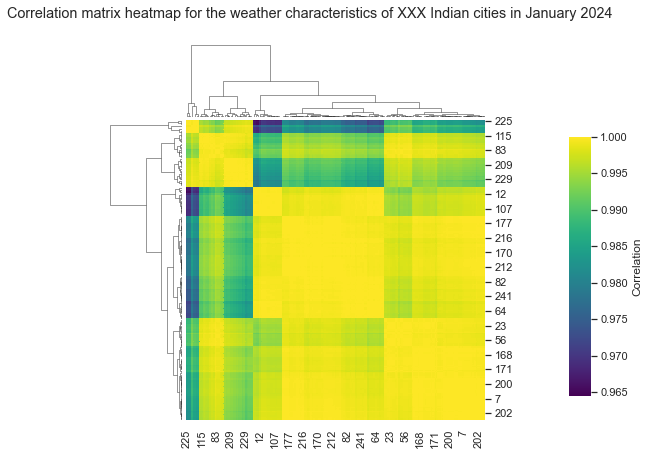

In [12]:
# Clustermap for weather data per city using an average linkage method and euclidean distance metric
cluster_city = sns.clustermap(cor_weather, method="average", metric="euclidean", cmap="viridis", figsize = (6,6), cbar_kws={"label":"Correlation"}, cbar_pos = (1.1,0.15,0.05,0.6))
cluster_city = cluster_city.fig.suptitle("Correlation matrix heatmap for the weather characteristics of XXX Indian cities in January 2024", y=1.05)

In [13]:
# Aggregating relevant state-level data
state_level_df = dataset.groupby('State').agg({
    'State Population': 'first',  # State population is the same for all cities in a state
    'State Area (sq. km)': 'first',
    'Forest Area(sq. km in state)': 'first',
    'Registered Vehicles in State': 'first',
    'Farmers (in state)': 'first',
    'Factories (in state)': 'first',
    'Shipping Cargo Volume ( million metric tons in state)': 'first',
    'Coal Capacity (Max Electricity ouput in MW)': 'first',  
    'Gas Capacity (Max Electricity ouput in MW)': 'first',
    'Temperature': 'mean',  #average temperature across the cities
    'Pressure': 'mean',
    'Humidity': 'mean',
    'Wind': 'mean',
    'Precipitation': 'mean',
    'Clouds': 'mean',
    'Sunshine': 'mean',
    'aqi': 'mean',  # Average AQI across cities in the state
    'missing_aqi': 'mean'  # Average of missing AQI proportions
}).reset_index()

# Define AQI categories and corresponding labels
aqi_bins = [0, 50, 100, 200, 300, 400, 500]
aqi_labels = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]

# Add the AQI_Category column with categorical data type
state_level_df['AQI Category'] = pd.cut(
    state_level_df['aqi'], 
    bins=aqi_bins, 
    labels=aqi_labels, 
    include_lowest=True
)

# Convert AQI_Category to a categorical data type with ordered categories
state_level_df['AQI Category'] = pd.Categorical(
    state_level_df['AQI Category'], 
    categories=aqi_labels, 
    ordered=True
)

display(state_level_df)

,State,State Population,State Area (sq. km),Forest Area(sq. km in state),Registered Vehicles in State,Farmers (in state),Factories (in state),Shipping Cargo Volume ( million metric tons in state),Coal Capacity (Max Electricity ouput in MW),Gas Capacity (Max Electricity ouput in MW),Temperature,Pressure,Humidity,Wind,Precipitation,Clouds,Sunshine,aqi,missing_aqi,AQI Category
0,andhra pradesh,53402000.0,162968.0,29784.00,13108491.0,16967754.0,0.0,175.18,11275.0,7508.20,296.416250,1007.492500,72.758750,2.388750,0.010000,27.730000,126.517500,108.428128,0.173387,Moderate
1,arunachal pradesh,1580000.0,83743.0,66431.00,230126.0,36171.0,0.0,0.00,0.0,0.00,288.900000,1011.150000,71.490000,1.420000,0.020000,32.070000,98.920000,89.454545,0.290323,Satisfactory
2,assam,36159000.0,78438.0,28312.00,4358529.0,1845346.0,6425.0,0.00,0.0,479.20,289.920000,1012.134000,76.724000,1.432000,0.024000,31.892000,116.046000,189.857048,0.086022,Moderate
3,bihar,129205000.0,94163.0,7381.00,9903889.0,18345649.0,6345.0,0.00,10040.0,0.00,288.837000,1017.316500,69.373500,2.293000,0.168500,23.542000,190.784000,227.372241,0.102919,Poor
4,chandigarh,1247000.0,114.0,22.88,1058857.0,1687.0,423.0,0.00,0.0,0.00,285.620000,998.690000,67.120000,2.300000,0.040000,26.400000,196.920000,289.225806,0.000000,Poor
5,chhattisgarh,30638000.0,135192.0,55717.00,6986219.0,5091882.0,5103.0,0.00,17795.0,0.00,292.322500,1003.602500,57.402500,1.877500,0.010000,15.635000,216.077500,98.811884,0.084677,Satisfactory
6,delhi,21884000.0,1483.0,195.00,11892877.0,39475.0,0.0,0.00,0.0,2208.40,286.220000,1015.600000,80.840000,2.310000,0.010000,30.560000,141.310000,354.838710,0.000000,Very Poor
7,gujarat,72653000.0,196244.0,14926.00,26836981.0,6839415.0,36727.0,553.92,15592.0,7990.72,294.378000,1016.344000,58.928000,2.956000,0.000000,9.132000,256.108000,111.773422,0.170507,Moderate
8,haryana,30694000.0,44212.0,1603.00,8599668.0,1528133.0,13780.0,0.00,4065.0,430.00,286.389583,1011.462917,67.899583,2.380417,0.018333,23.964583,185.014583,177.193706,0.059140,Moderate
9,himachal pradesh,7518000.0,55673.0,15443.00,1711920.0,175038.0,5254.0,0.00,0.0,0.00,285.620000,998.690000,67.120000,2.300000,0.040000,26.400000,196.920000,298.766667,0.032258,Poor


Text(0.5, 0.98, 'Histograms of seven weather characteristics of XXX Indian cities in January 2024')

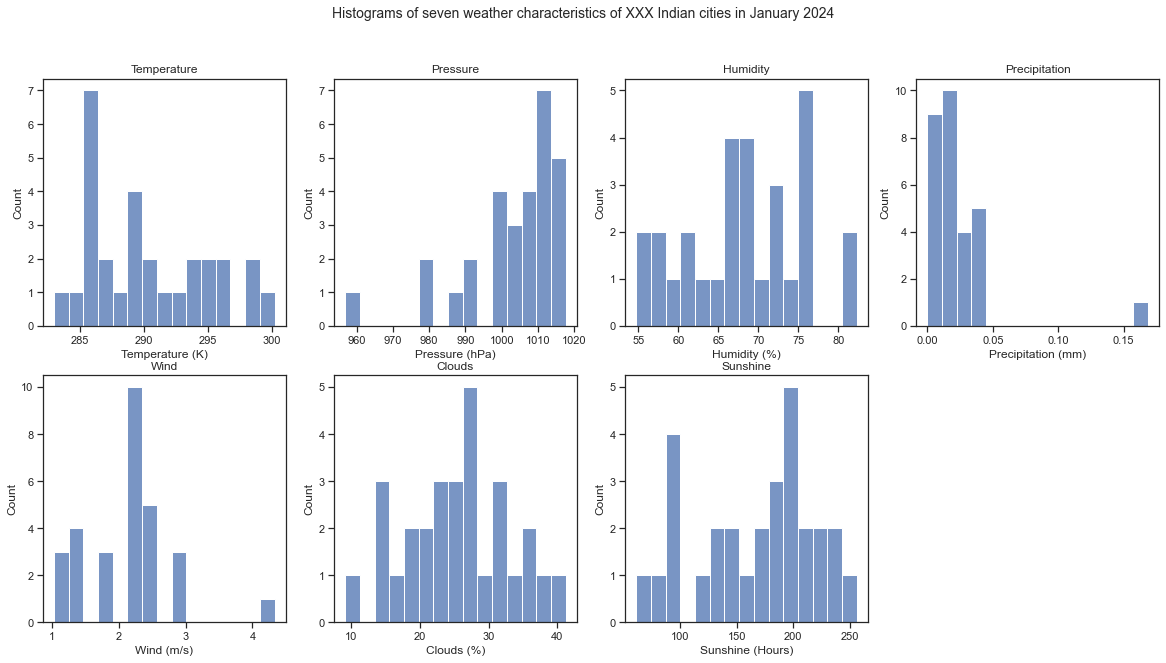

In [14]:
# Histograms per weather characteristic on state level
sns.set_theme(style='ticks')
fig, axs = plot.subplots(2,4, figsize=(20,10))
n_bins = 15

# Temperature plot
sns.histplot(data = state_level_df["Temperature"], bins = n_bins, ax = axs[0,0])
axs[0,0].set_title("Temperature", fontsize=12)
axs[0,0].set(xlabel="Temperature (K)", ylabel = "Count")

# Pressure plot
sns.histplot(state_level_df["Pressure"],bins = n_bins, ax = axs[0,1])
axs[0,1].set_title("Pressure", fontsize=12)
axs[0,1].set(xlabel="Pressure (hPa)", ylabel = "Count")

# Humidity plot
sns.histplot(data = state_level_df["Humidity"], bins = n_bins, ax = axs[0,2])
axs[0,2].set_title("Humidity", fontsize=12)
axs[0,2].set(xlabel="Humidity (%)", ylabel = "Count")

# Precipitation plot
sns.histplot(data = state_level_df["Precipitation"], bins = n_bins, ax = axs[0,3])
axs[0,3].set_title("Precipitation", fontsize=12)
axs[0,3].set(xlabel="Precipitation (mm)", ylabel = "Count")

# Wind plot
sns.histplot(data = state_level_df["Wind"], bins = n_bins, ax = axs[1,0])
axs[1,0].set_title("Wind", fontsize=12)
axs[1,0].set(xlabel="Wind (m/s)", ylabel = "Count")

# Clouds plot
sns.histplot(data = state_level_df["Clouds"], bins = n_bins, ax = axs[1,1])
axs[1,1].set_title("Clouds", fontsize=12)
axs[1,1].set(xlabel="Clouds (%)", ylabel = "Count")

# Sunshine plot
sns.histplot(data = state_level_df["Sunshine"], bins = n_bins, ax = axs[1,2])
axs[1,2].set_title("Sunshine", fontsize=12)
axs[1,2].set(xlabel="Sunshine (Hours)", ylabel = "Count")

fig.delaxes(axs[1,3])
fig.suptitle("Histograms of seven weather characteristics of XXX Indian states in January 2024", fontsize=14)

Text(0.5, 0.98, 'Histograms of seven weather characteristics of XXX Indian states in January 2024')

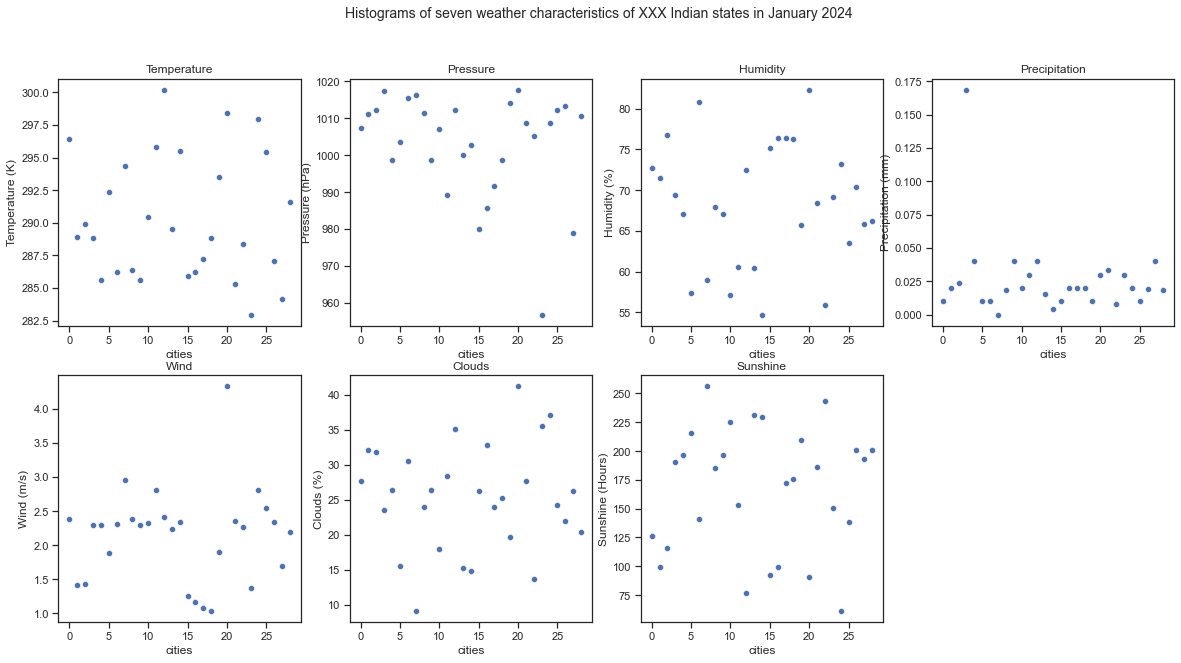

In [15]:
# Scatterplot per weather characteristic on state level
sns.set_theme(style='ticks')
fig, axs = plot.subplots(2,4, figsize=(20,10))
n_bins = 15

# Temperature plot
sns.scatterplot(data = state_level_df["Temperature"], ax = axs[0,0])
axs[0,0].set_title("Temperature", fontsize=12)
axs[0,0].set(xlabel = "cities", ylabel="Temperature (K)")

# Pressure plot
sns.scatterplot(data = state_level_df["Pressure"], ax = axs[0,1])
axs[0,1].set_title("Pressure", fontsize=12)
axs[0,1].set(xlabel = "cities", ylabel="Pressure (hPa)")

# Humidity plot
sns.scatterplot(data = state_level_df["Humidity"], ax = axs[0,2])
axs[0,2].set_title("Humidity", fontsize=12)
axs[0,2].set(xlabel = "cities", ylabel="Humidity (%)")

# Precipitation plot
sns.scatterplot(data = state_level_df["Precipitation"], ax = axs[0,3])
axs[0,3].set_title("Precipitation", fontsize=12)
axs[0,3].set(xlabel = "cities", ylabel="Precipitation (mm)")

# Wind plot
sns.scatterplot(data = state_level_df["Wind"], ax = axs[1,0])
axs[1,0].set_title("Wind", fontsize=12)
axs[1,0].set(xlabel = "cities", ylabel="Wind (m/s)")

# Clouds plot
sns.scatterplot(data = state_level_df["Clouds"], ax = axs[1,1])
axs[1,1].set_title("Clouds", fontsize=12)
axs[1,1].set(xlabel = "cities", ylabel="Clouds (%)")

# Sunshine plot
sns.scatterplot(data = state_level_df["Sunshine"],  ax = axs[1,2])
axs[1,2].set_title("Sunshine", fontsize=12)
axs[1,2].set(xlabel = "cities", ylabel="Sunshine (Hours)")

fig.delaxes(axs[1,3])
fig.suptitle("Histograms of seven weather characteristics of XXX Indian states in January 2024", fontsize=14)

Text(0.5, 1.04, 'Pairplot of weather characteristics for XXXX states in India in January 2024')

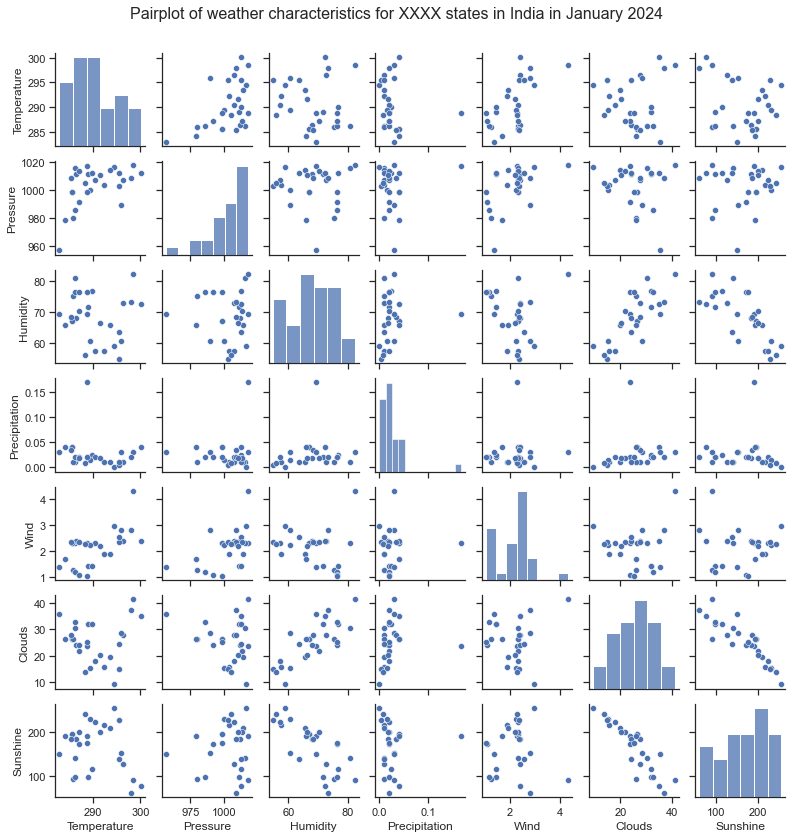

In [18]:
# Pairplot for weather characteristics on state Level
sns.pairplot(state_level_df[["Temperature", "Pressure", "Humidity", "Precipitation", "Wind", "Clouds", "Sunshine"]], height =1.6)
plot.suptitle("Pairplot of weather characteristics for XXXX states in India in January 2024", y = 1.04, fontsize='16')

Text(120.453125, 0.5, 'Weather Characteristics')

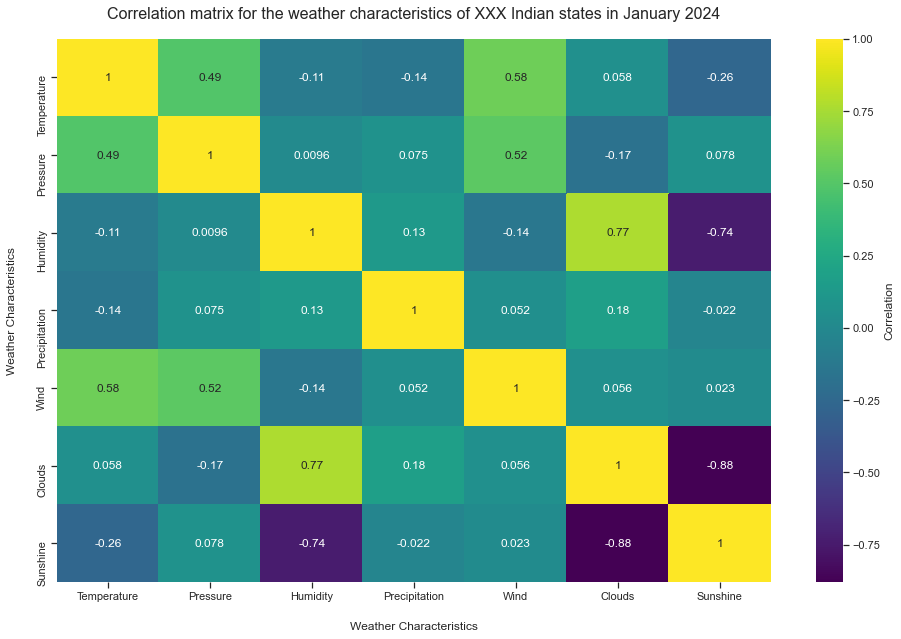

In [21]:
# Heatmap for weather characteristics on state level
dataset_weather_state = state_level_df[["Temperature", "Pressure", "Humidity", "Precipitation", "Wind", "Clouds", "Sunshine"]]
# Correlation matrix
cor_weather_df = pd.DataFrame(index = dataset_weather_state.columns, columns = dataset_weather_state.columns)

# Calculating the pearson correlation for each pair of weather data
for i in range(len(dataset_weather_state.columns)):
    for j in range(len(dataset_weather_state.columns)):
        cor_weather_df.iloc[i,j]=dataset_weather_state.iloc[:,i].corr(dataset_weather_state.iloc[:,j])
cor_weather = cor_weather_df.values.astype(float)

# Plot the correlation matrix as a heatmap
fig, ax = plot.subplots(1,1, figsize=(16,10))
sns.heatmap(cor_weather, annot = True, cmap='viridis',cbar_kws={"label":"Correlation"}, xticklabels=dataset_weather.columns, yticklabels=dataset_weather.columns)
plot.title("Correlation matrix for the weather characteristics of XXX Indian states in January 2024", fontsize = 16, pad = 20)
ax.set_xlabel("Weather Characteristics", labelpad = 20, fontsize = 12)
ax.set_ylabel("Weather Characteristics", labelpad = 20, fontsize = 12)

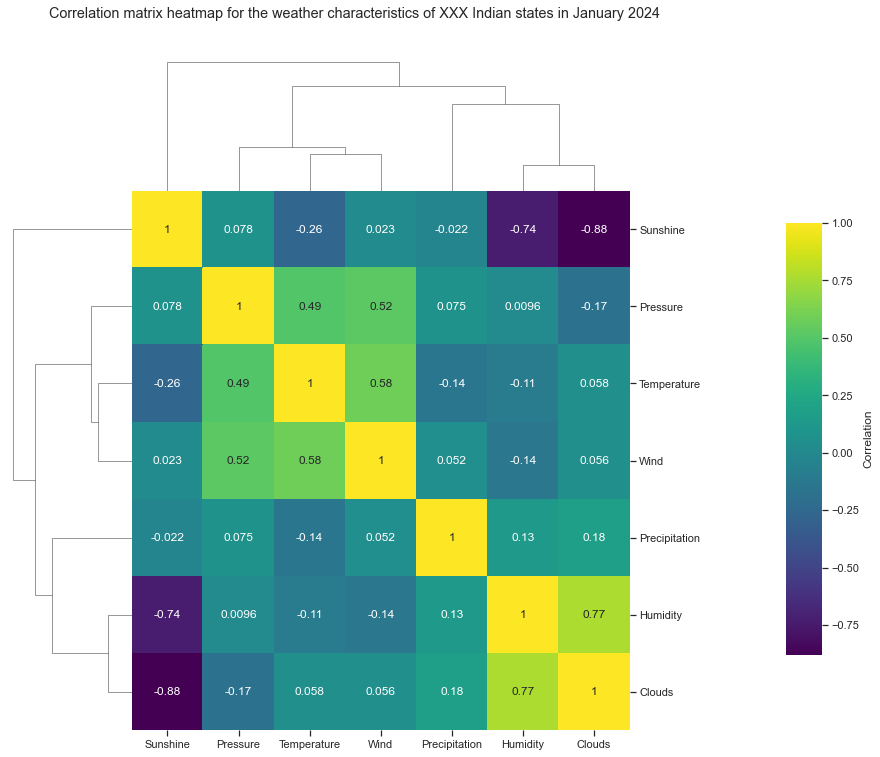

In [22]:
# Clustermap for weather data per state using an average linkage method and euclidean distance metric
cluster_city = sns.clustermap(cor_weather, annot = True, method="average", metric="euclidean", cmap="viridis", figsize = (10,10), cbar_kws={"label":"Correlation"}, cbar_pos = (1.1,0.15,0.05,0.6),xticklabels=dataset_weather.columns, yticklabels=dataset_weather.columns)
cluster_city = cluster_city.fig.suptitle("Correlation matrix heatmap for the weather characteristics of XXX Indian states in January 2024", y=1.05)

Text(120.453125, 0.5, 'States')

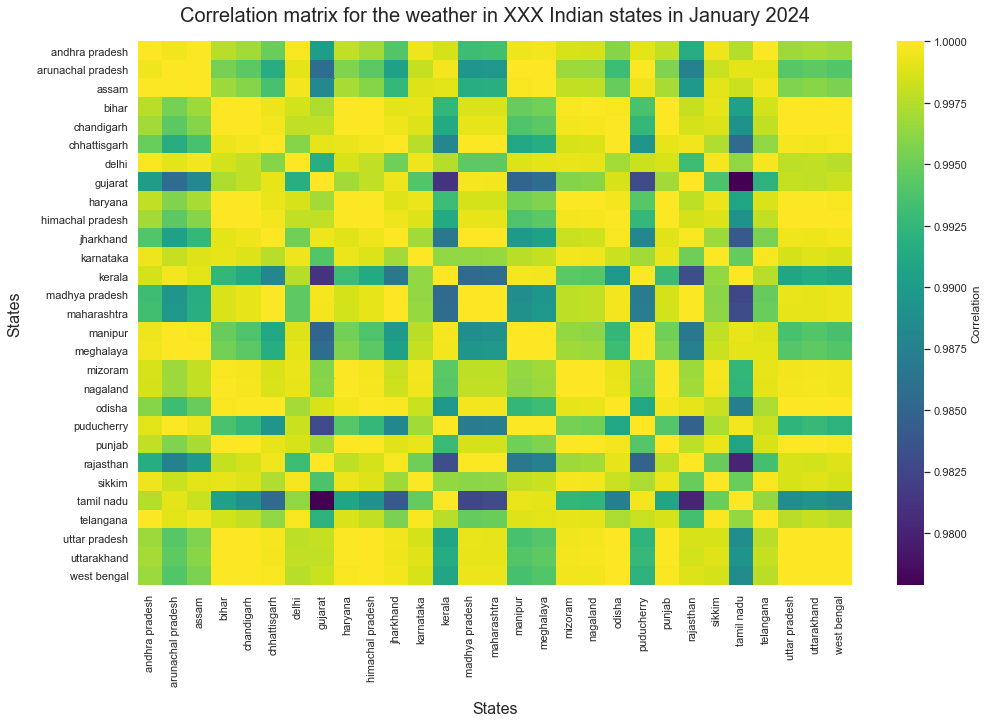

In [25]:
# Heatmap for cities on city level
# Correlation matrix
cor_weather_df = pd.DataFrame(index = dataset_weather_state.index, columns = dataset_weather_state.index)

# Calculating the pearson correlation for each pair of weather data
for i in range(len(dataset_weather_state.index)):
    for j in range(len(dataset_weather_state.index)):
        cor_weather_df.iloc[i,j]=dataset_weather_state.iloc[i,:].corr(dataset_weather_state.iloc[j,:])
cor_weather = cor_weather_df.values.astype(float)

# Plot the correlation matrix as a heatmap
fig, ax = plot.subplots(1,1, figsize=(16,10))
sns.set(font_scale=1)
ax = sns.heatmap(cor_weather, cmap='viridis',cbar_kws={"label":"Correlation"}, xticklabels=state_level_df["State"], yticklabels=state_level_df["State"])
plot.title("Correlation matrix for the weather in XXX Indian states in January 2024", fontsize = 20, pad = 20)
ax.set_xlabel("States", labelpad = 15, fontsize = 16)
ax.set_ylabel("States", labelpad = 15, fontsize = 16)

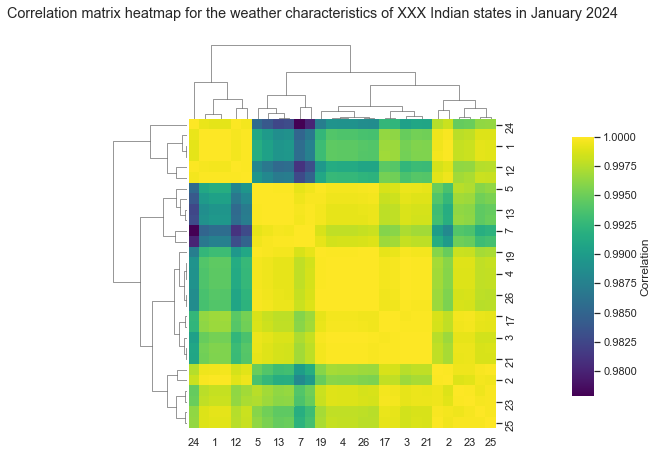

In [26]:
# Clustermap for weather data per city using an average linkage method and euclidean distance metric
cluster_city = sns.clustermap(cor_weather, method="average", metric="euclidean", cmap="viridis", figsize = (6,6), cbar_kws={"label":"Correlation"}, cbar_pos = (1.1,0.15,0.05,0.6))
cluster_city = cluster_city.fig.suptitle("Correlation matrix heatmap for the weather characteristics of XXX Indian states in January 2024", y=1.05)